# Projeto 1- Ciência dos Dados
Aluno: Enrico Aloisi Nardi (RM:18610232)

Turma: 2A

Professor: Fabio José Ayres

***

### Introdução:

   O Índice de Desenvolvimento Humano (IDH) é um dos indicadores sócio-econômicos mais utilizados para classificar países no que diz respeito à sua qualidade de vida. Este indicador é composto pelo PIB (Produto Interno Bruto), pela expectativa de vida da população e pelo seus anos médios de estudo. O presente trabalho buscou avaliar como outras variáveis e indicativos sócio-econômicos se relacionam com o IDH de uma nação. Estes outros indicadores foram escolhidos de modo a combinar em pares os componentes do IDH. Deste modo, a variável 'porcentagem dos gastos das reservas pessoais com saúde' buscou combinar o PIB e a expectativa de vida, enquanto a variável 'porcentagem do PIB proveniente da agricultura' buscou combinar o PIB e os anos médios de estudo da população.
   
#### Pergunta motivadora: 
Como a quantidade de dinheiro que a população investe do seu próprio bolso na sua saúde e a porcentagem do PIB proveniente da agricultura determinam como o IDH deste país se desenvolve?

In [169]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
idh= pd.read_excel('hdi_human_development_index.xlsx')
idh_idx= idh.set_index('geo')     #transformando o nome do país no nome da linha correspondente
idh_cortado= pd.DataFrame(idh_idx.loc[:, 2000]) #escolhendo apenas o ano de 1995
                                  
#este procedimento foi repetido para os data frames seguidos

out_pkc= pd.read_excel('out_of_pocket_share_of_total_health_spending_percent.xlsx')
out_pkc_idx= out_pkc.set_index('geo')
out_cortado= pd.DataFrame(out_pkc_idx.loc[:, 2000])

agricultura= pd.read_excel('agriculture_percent_of_gdp.xlsx')
agricultura_idx= agricultura.set_index('geo')
agricultura_cortada= pd.DataFrame(agricultura_idx.loc[:, 2000])
agricultura_cortada_renomeada= agricultura_cortada.rename(index=str, columns={2000:'2000_Agriculture'})

In [195]:
df_resultante= idh_cortado.join(out_cortado, how= 'inner', lsuffix= '_IDH', rsuffix= '_Out of pocket')#DataFrame gerado a partir da combinação dos outros três anteriores
df_resultante2= df_resultante.join(agricultura_cortada_renomeada, how='inner')
df_resultante2= df_resultante2.dropna()
df_resultante2

,2000_IDH,2000_Out of pocket,2000_Agriculture
geo,,,
Albania,0.662,63.80,26.5000
Algeria,0.644,25.80,8.9800
Angola,0.391,20.80,5.6600
Argentina,0.771,29.10,5.0500
Armenia,0.644,77.10,25.5000
Australia,0.899,19.80,3.3800
Austria,0.837,15.30,1.8500
Azerbaijan,0.642,63.20,17.1000
Bahamas,0.779,21.10,2.8500


### Análise geral dos dados selecionados

In [172]:
df_resultante2.describe()

,2000_IDH,2000_Out of pocket,2000_Agriculture
count,113.000000,113.000000,113.000000
mean,0.615230,36.528053,17.458388
std,0.184292,22.160105,15.789639
min,0.268000,2.940000,0.098800
25%,0.444000,17.700000,3.540000
50%,0.642000,31.700000,13.300000
75%,0.782000,55.300000,27.400000
max,0.917000,98.900000,76.100000


In [173]:
df_resultante2.corr() #organização dos coeficientes de correlação existentes entre os dados apresentados

,2000_IDH,2000_Out of pocket,2000_Agriculture
2000_IDH,1.000000,-0.477140,-0.766782
2000_Out of pocket,-0.477140,1.000000,0.467286
2000_Agriculture,-0.766782,0.467286,1.000000


In [205]:
#função que traça a linha de tendência da dispersão dos dados sob análise
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()

### +Plotagens do IDH em função do quanto a população gasta com saúde do próprio bolso

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.7601763674570173
Coeficiente angular: -0.003968081150538424


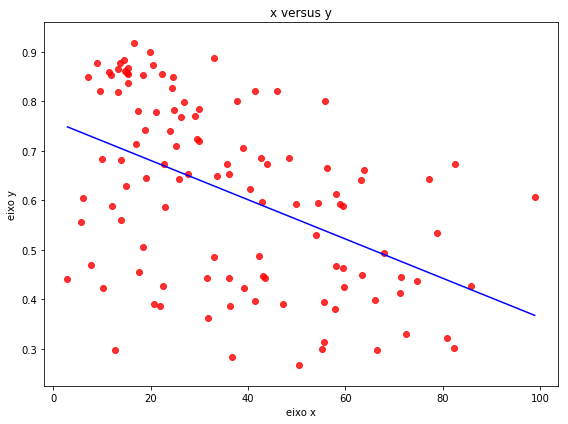

In [206]:
reta(df_resultante2['2000_Out of pocket'], df_resultante2['2000_IDH'])

### +Plotagens: IDH por representativadade da agricultura no PIB do país

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.7714765250625131
Coeficiente angular: -0.0089496487334201


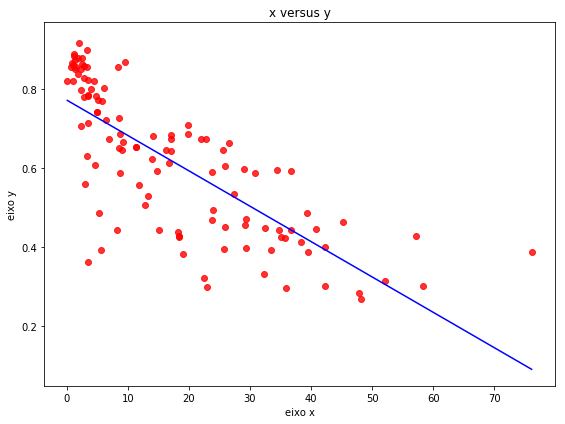

In [207]:
reta(df_resultante2['2000_Agriculture'],df_resultante2['2000_IDH'])

### +Cruzamento de dados

Ajuste linear entre X3 e X4:
Coeficiente linear: 25.07855964278597
Coeficiente angular: 0.6558162019266174


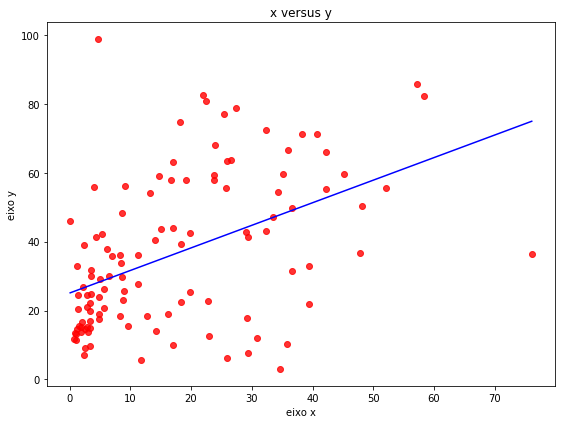

In [208]:
reta(df_resultante2['2000_Agriculture'],df_resultante2['2000_Out of pocket'])

# Conclusão e análise
   ---
   A partir de uma análise das medidas de dispersão fornecidas pelo comando .describe() e pela tabela que estabelece a correlação entre duas variáveis, é possível notar que existe uma sutil relação entre a média de gastos dispendidos pela população do seu próprio capital com saúde e o aumento do IDH (sendo que esta sutileza pode ser confirmada tanto pelo espalhamento dos pontos na dipersão plotada acima, como pelo coeficiente de correlação de -0.46).    Esta relação provavelmente    decorre do fato que quanto mais capital um país tem disponível, mais ele investe em áreas cruciais do setor público, como a da    saúde ou da previdência, que juntas são capazaes de aumentar a expectativa de vida da população ao fornecerem a esta um maior suporte quando a sua idade ja é mais avançada, aumentando portanto a componente da expectativa de vida do indicador.
   
   De modo análogo, também estão relacionados o IDH de uma nação e a porcentagem que a atividade agrícola ocupa no seu PIB. Esta relação pode ser confirmada não só gráfica (afinal, como é possível notar através da segunda dispersão apresentada acima, existe um acúmulo de pontos no canto superior esquerdo da área de plotagem, o que revela que países com uma menor participação da agricultura no PIB geralmente têm maior IDH) e numericamente (vide o coeficiente de correlação de -0.76), mas também logicamente. Uma vez que a diminuição da participação da agricultura na economia de um país muito provavelmente decorre da substituição desta atividade por outrasque demandam um maior nível de formação e instrução, o que aumenta o valor da componente de 'anos médios de estudo' do IDH, aumentando, portanto, o valor deste indicador. A outra componente do IDH que é alteradas com a referida substituição de atividades econômicas é a do PIB, uma vez que o mercado de capitais ou a maior parte das indústrias tendem a movimentar mais dinheiro que a agricultura. 
   
   Por fim, a relação existente entre todas estas variáveis torna-se mais clara com a plotagem da terceira dispersão, que mostra quanto menor for a participação da agricultura na economia de um país, menor é a tendência que a sua população despenda dinheiro da sua reseva pessoal com gastos de saúde e tem coeficiente de correlação 0.47. O fator de provável maior importância que gera esta tendência é o fato de que quanto menor é a participação da agricultura no PIB, de modo geral, maior é o segundo valor, e quanto maior ele for, mais capital está disponível para o investimento no setor da saúde pública. Deste modo, sendo o PIB um dos componentes do IDH, pode-se aplicar uma lógica em 'cascata' que faz a agricultura influenciar na quantidade de dinheiro gasta pela população com a sua saúde sem auxílio governamental.

   ---
### Fontes:
[Fonte geral dos dados](https://www.gapminder.org/data/)

[Gapminder: IDH x porcentagem gasta com saúde do 'próprio bolso'](https://www.gapminder.org/tools/#$state$time$value=2010;&marker$select@$geo=chn;;&axis_x$which=out_of_pocket_share_of_total_health_spending_percent&domainMin:null&domainMax:null&zoomedMin:null&zoomedMax:null&scaleType=linear&spaceRef:null;&axis_y$which=hdi_human_development_index&domainMin:null&domainMax:null&zoomedMin:null&zoomedMax:null&spaceRef:null;;;&ui$chart$trails:false;;&chart-type=bubbles)

[Gapminder: IDH x contribuição da agricultura com o PIB](https://www.gapminder.org/tools/#$state$time$value=2015;&marker$axis_x$which=agriculture_percent_of_gdp&domainMin:null&domainMax:null&zoomedMin:null&zoomedMax:null&scaleType=linear&spaceRef:null;&axis_y$which=hdi_human_development_index&domainMin:null&domainMax:null&zoomedMin:null&zoomedMax:null&spaceRef:null;;;&chart-type=bubbles)
